In [1]:
%matplotlib inline
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from marketdata import *
from model import *
from analytics import *
import math
from datetime import datetime
import statsmodels.api as sm
from arctic import Arctic

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
list_of_markets=['C','JM','I','M','BB','J','CS','PP','L','V','JD','P','A','Y']

In [3]:
df=pd.DataFrame()
for m in list_of_markets:
    try:
        df[m]=get_timeseries(m)
    except:
        break

# Building trading cost model

model.py:5: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(256)
model.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=250,center=False).mean()
  signal=pd.rolling_mean(data,signal_lookback)


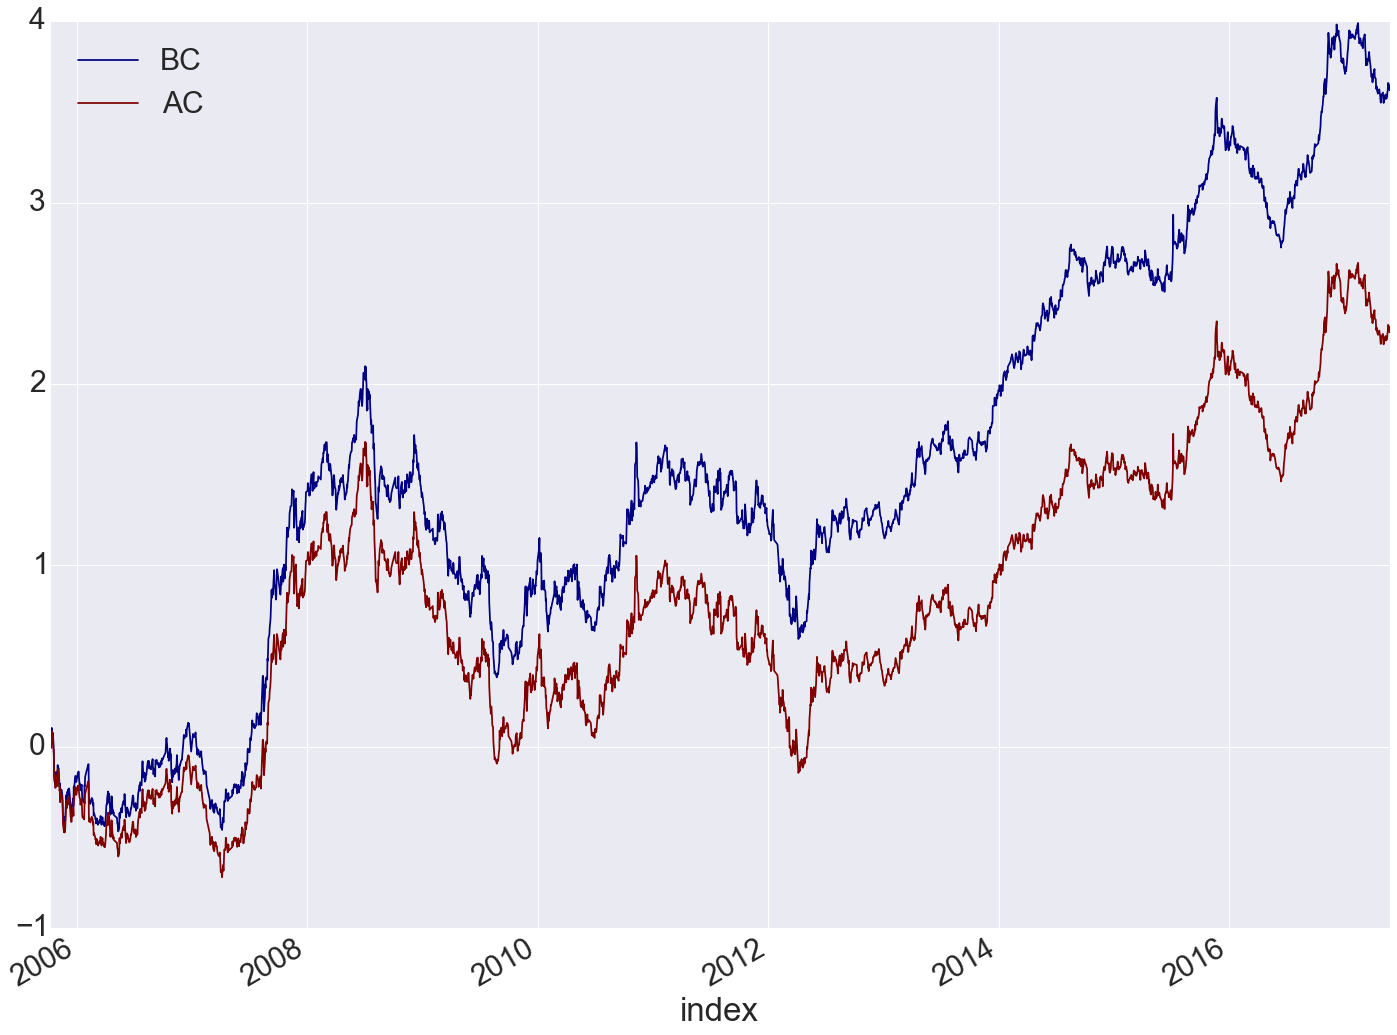

In [4]:
pos=tsmom_daily(df,250)
rtn=pd.DataFrame()
pnl_bc=calc_pnl(pos,df)
rtn['BC']=ew_portfolio_pnl(pnl_bc)
pnl_ac=calc_pnl_wc(pos,df,fee=.001)
rtn['AC']=ew_portfolio_pnl(pnl_ac)
rtn.cumsum().plot(colormap='jet')

In [5]:
rtn.std()*16

BC    0.583959
AC    0.584533
dtype: float64

model.py:14: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  vol=pd.ewmstd(data,vol_lookback,min_periods=vol_lookback)*math.sqrt(256)
model.py:15: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).mean()
  signal=signal=pd.ewma(data,short_lookback)-pd.ewma(data,long_lookback)
model.py:15: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=60).mean()
  signal=signal=pd.ewma(data,short_lookback)-pd.ewma(data,long_lookback)
model.py:28: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=120,adjust=True,com=

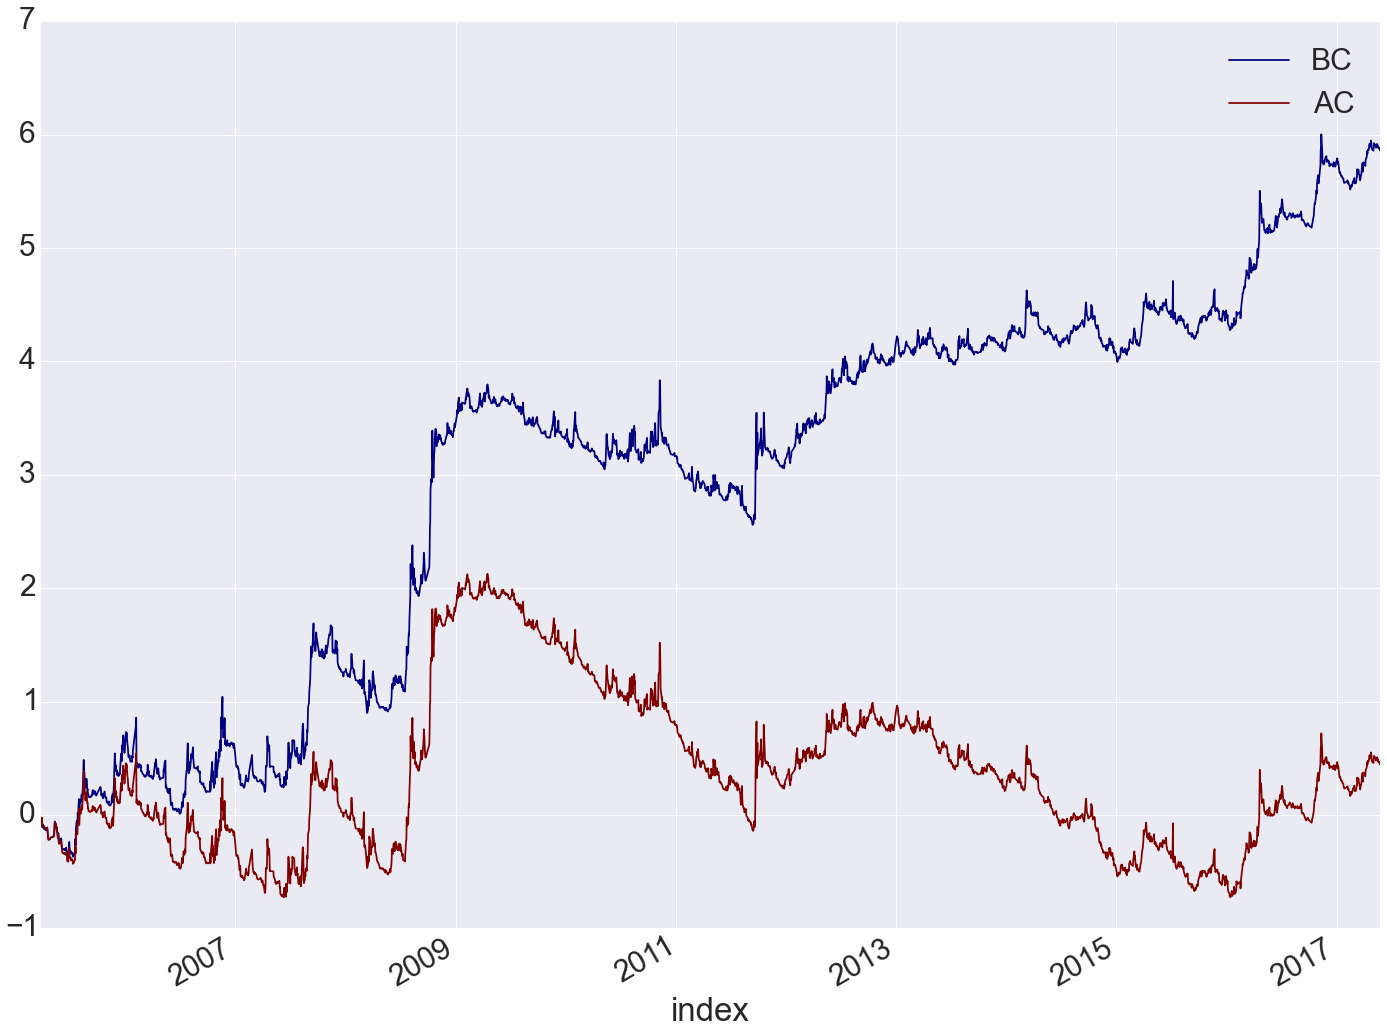

In [6]:
pos=ewma_mom_daily(df,20,60)
rtn=pd.DataFrame()
pnl_bc=calc_pnl(pos,df)
rtn['BC']=ew_portfolio_pnl(pnl_bc)
pnl_ac=calc_pnl_wc(pos,df,fee=.001)
rtn['AC']=ew_portfolio_pnl(pnl_ac)
rtn.cumsum().plot(colormap='jet')